# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.256166,23.11
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.079428,25.18
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.096759,20.67
242,17.82,1.75,Male,No,Sat,Dinner,2,0.108899,16.07


(0.0, 10.5)

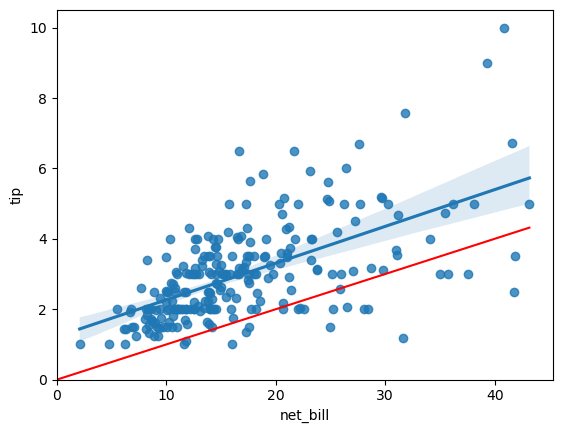

In [3]:
# Gráfico de dispersão
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])

# Gerando dados para a linha dos 10%
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

# Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

In [4]:
reg = smf.ols('tip ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Fri, 10 May 2024   Prob (F-statistic):           5.02e-23
Time:                        21:30:11   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2. Mudança de perspectiva
Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão 
correspondente.


In [5]:
reg2 = smf.ols('tip_pct ~ net_bill', data = tips).fit()
reg2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Fri, 10 May 2024   Prob (F-statistic):           1.52e-06
Time:                        21:30:11   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\raul_\AppData\Local\Temp\ipykernel_28108\141616410.py:3: RuntimeWarning: invalid value encountered in divide
  y = 0.1 * x / (x + 0.1 * x)  # Porcentagem da gorjeta em relação ao total do consumo


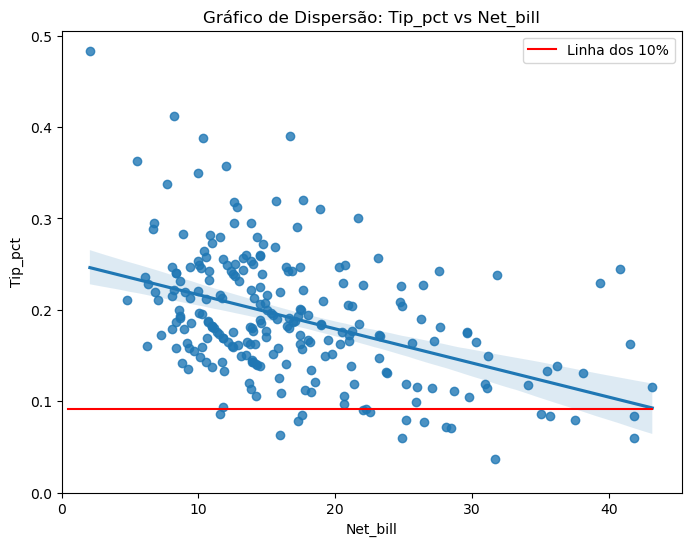

In [6]:
# Gerando dados para a linha dos 10%
x = np.linspace(0, tips['net_bill'].max(), 100)
y = 0.1 * x / (x + 0.1 * x)  # Porcentagem da gorjeta em relação ao total do consumo

# Gráfico de dispersão com regressão e linha dos 10%
plt.figure(figsize=(8, 6))
sns.regplot(y='tip_pct', x='net_bill', data=tips[tips['tip_pct'] < 0.5])
plt.plot(x, y, '-r', label='Linha dos 10%')
plt.title('Gráfico de Dispersão: Tip_pct vs Net_bill')
plt.xlabel('Net_bill')
plt.ylabel('Tip_pct')
plt.legend()
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()


### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

Os resultados da regressão mostram que o modelo para tip tem um R-quadrado de 0.333, indicando que cerca de 33.3% da variabilidade em tip é explicada pela variável net_bill. Por outro lado, o modelo para tip_pct tem um R-quadrado de 0.091, indicando que apenas cerca de 9.1% da variabilidade em tip_pct é explicada pela variável net_bill.

Essa diferença nos R-quadrados sugere que a variável net_bill tem uma relação mais forte com tip do que com tip_pct. No entanto, é importante notar que o R-quadrado sozinho não é suficiente para determinar a qualidade do ajuste do modelo, e é sempre útil considerar outros fatores, como a interpretação dos coeficientes e a análise dos resíduos.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [11]:
# Obtendo valores preditos para tip_pct
tips['pred_tip_pct'] = reg2.fittedvalues

# Calculando valores preditos para tip
tips['pred_tip'] = tips['pred_tip_pct'] * tips['net_bill']

reg3 = smf.ols('pred_tip ~ net_bill', data = tips).fit()
print(f"R-quadrado para o modelo de tip_pct: {reg3.rsquared}")
print(f"R-quadrado para item 1: {reg.rsquared}")



R-quadrado para o modelo de tip_pct: 0.29185213963974843
R-quadrado para item 1: 0.3325407312323707


Com a predição das gorjetas, tivemos um R² mais próximo com o do primeiro item